In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('beans.csv',';')


/var/folders/wn/plp5z4pj25l95mph65w0kvkr0000gn/T/ipykernel_8067/3941810873.py:5: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  df = pd.read_csv('beans.csv',';')


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Beans          10 non-null     object
 1   date           10 non-null     object
 2   beans_prices   10 non-null     int64 
 3   revenue_packs  10 non-null     int64 
 4   revenue_menu   10 non-null     int64 
 5   cource         10 non-null     object
dtypes: int64(3), object(3)
memory usage: 608.0+ bytes


Корреляция между ценами на зерна и общей выручкой: 0.26224629334197685


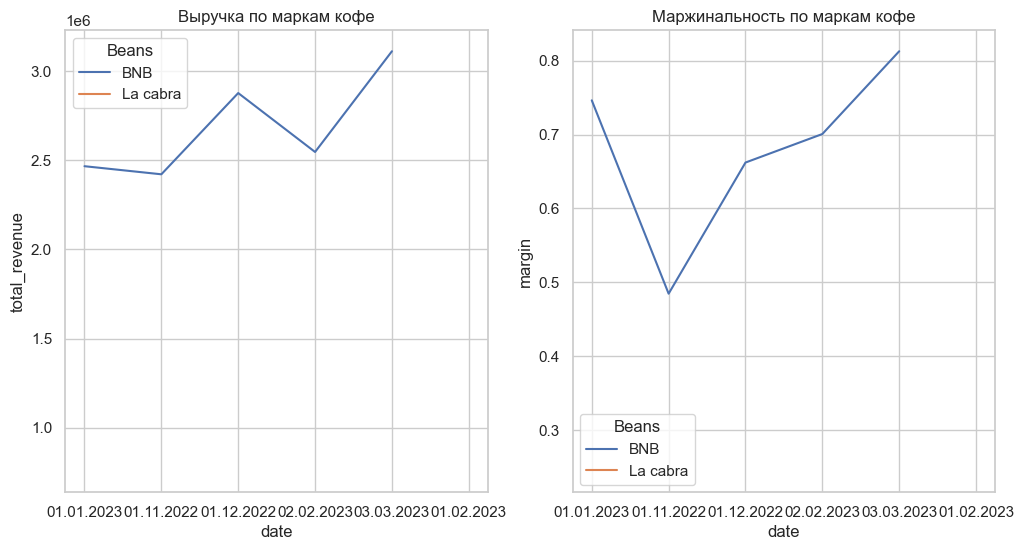

In [19]:

# Фильтрация данных по нужным маркам кофе
df = df[df['Beans'].isin(['BNB', 'The barn', 'La cabra', 'Rose'])]

# Преобразование столбца с ценами на зерна в числовой формат
df['beans_prices'] = pd.to_numeric(df['beans_prices'], errors='coerce')

# Преобразование столбцов с выручкой с полок и меню в числовой формат
df['revenue_packs'] = pd.to_numeric(df['revenue_packs'], errors='coerce')
df['revenue_menu'] = pd.to_numeric(df['revenue_menu'], errors='coerce')

# Группировка данных по маркам кофе и месяцам
grouped_data = df.groupby(['Beans', 'date'])[['beans_prices', 'revenue_packs', 'revenue_menu']].sum()

# Добавление столбца с общей выручкой (сумма выручки с полок и меню)
grouped_data['total_revenue'] = grouped_data['revenue_packs'] + grouped_data['revenue_menu']

# Расчет корреляции между ценами на зерна и общей выручкой
correlation = grouped_data[['beans_prices', 'total_revenue']].corr().iloc[0, 1]

print(f'Корреляция между ценами на зерна и общей выручкой: {correlation}')

# Расчет маржинальности
grouped_data['margin'] = (grouped_data['revenue_packs'] + grouped_data['revenue_menu'] - grouped_data['beans_prices']) / (grouped_data['revenue_packs'] + grouped_data['revenue_menu'])

# Визуализация данных
sns.set(style='whitegrid')

fig, axs = plt.subplots(ncols=2, figsize=(12, 6))
sns.lineplot(x='date', y='total_revenue', hue='Beans', data=grouped_data, ax=axs[0])
sns.lineplot(x='date', y='margin', hue='Beans', data=grouped_data, ax=axs[1])

axs[0].set_title('Выручка по маркам кофе')
axs[1].set_title('Маржинальность по маркам кофе')

plt.show()


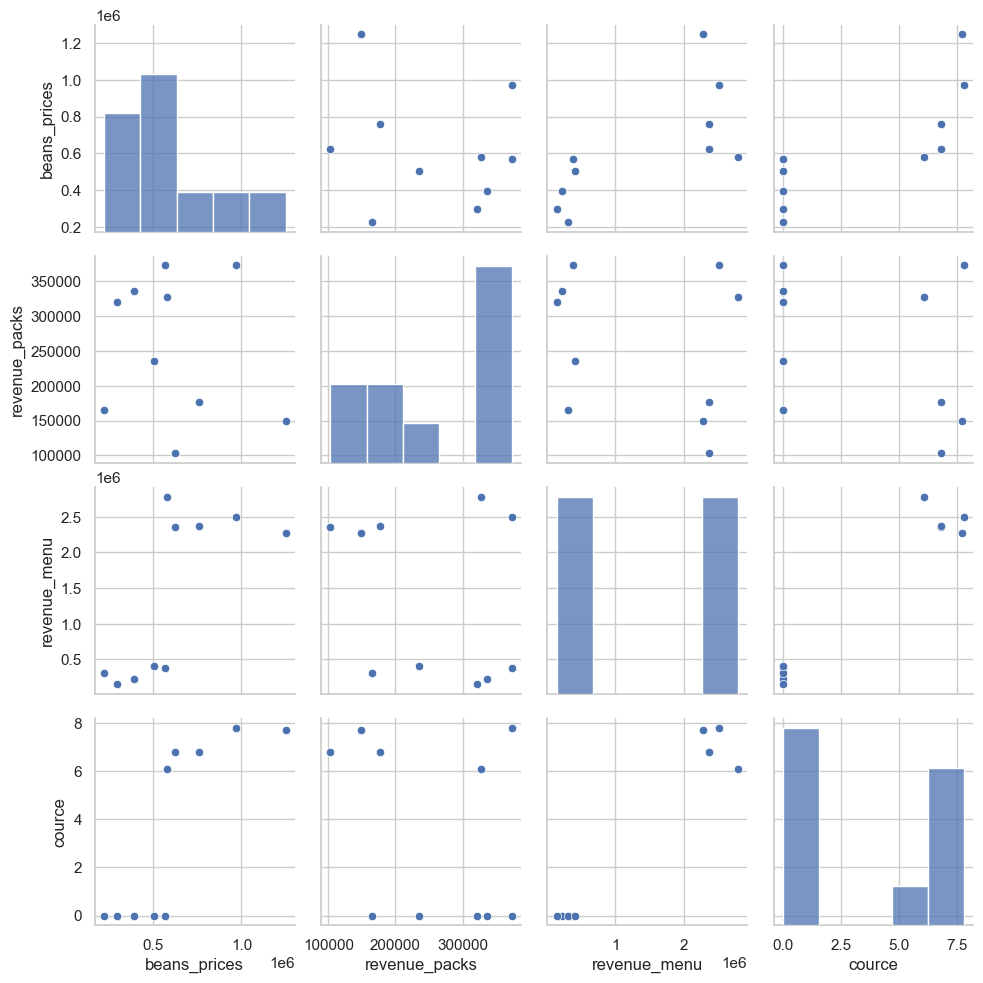

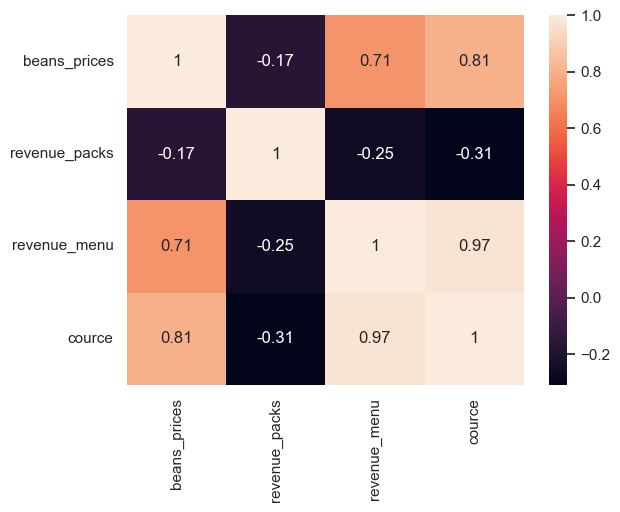

Корреляция между ценами на зерна и другими параметрами:
               beans_prices  revenue_packs  revenue_menu    cource
beans_prices       1.000000      -0.165365      0.711365  0.805487
revenue_packs     -0.165365       1.000000     -0.251902 -0.308474
revenue_menu       0.711365      -0.251902      1.000000  0.973707
cource             0.805487      -0.308474      0.973707  1.000000
Средняя маржинальность за полгода: 50.58779951046707


In [20]:

# Чтение данных из файла
data = pd.read_csv('beans.csv', delimiter=';')

# Преобразование данных в числовой формат
data = pd.read_csv('beans.csv', delimiter=';')

# Преобразование данных в числовой формат
data['beans_prices'] = pd.to_numeric(data['beans_prices'].astype(str).str.replace(',', '.'))
data['revenue_packs'] = pd.to_numeric(data['revenue_packs'].astype(str).str.replace(',', '.'))
data['revenue_menu'] = pd.to_numeric(data['revenue_menu'].astype(str).str.replace(',', '.'))
data['cource'] = pd.to_numeric(data['cource'].astype(str).str.replace(',', '.'))

# Расчет корреляции
corr = data[['beans_prices', 'revenue_packs', 'revenue_menu', 'cource']].corr()

# Визуализация результатов
sns.pairplot(data[['beans_prices', 'revenue_packs', 'revenue_menu', 'cource']])
plt.show()

sns.heatmap(corr, annot=True)
plt.show()

# Расчет маржинальности
data['marginality'] = ((data['revenue_packs'] + data['revenue_menu'] - data['beans_prices']) / (data['revenue_packs'] + data['revenue_menu'])) * 100

# Вывод результатов
print('Корреляция между ценами на зерна и другими параметрами:')
print(corr)

print('Средняя маржинальность за полгода:', data['marginality'].mean())



In [21]:


# Подсчет выручки с полок и меню
revenue_from_packs = data['revenue_packs'].sum()
revenue_from_menu = data['revenue_menu'].sum()

print(f"Выручка с полок: {revenue_from_packs}")
print(f"Выручка с меню: {revenue_from_menu}")


Выручка с полок: 2559707
Выручка с меню: 13781744


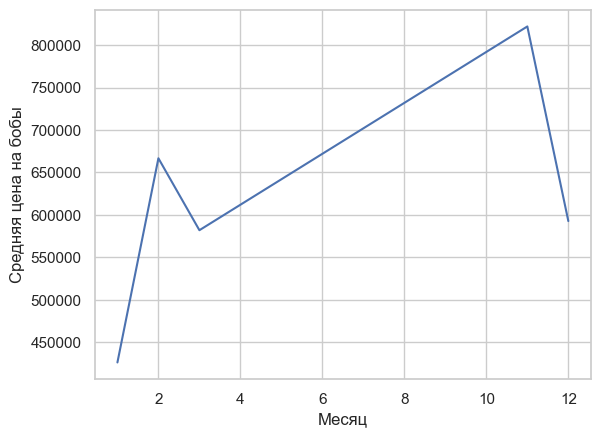

In [22]:
#Анализ изменения цен на бобы (Beans) со временем (date)

data['date'] = pd.to_datetime(data['date'], format='%d.%m.%Y')
mean_prices = data.groupby(data['date'].dt.month)['beans_prices'].mean()
plt.plot(mean_prices)
plt.xlabel('Месяц')
plt.ylabel('Средняя цена на бобы')
plt.show()


Анализ доходов от продаж. Можно посчитать общий доход за каждый месяц/квартал/год, а также доходы от продаж каждого товара (revenue_packs, revenue_menu) за каждый период. Это поможет понять, какой товар приносит больше доходов, как меняется доходность продаж в зависимости от времени, какие товары наиболее популярны у потребителей.

In [23]:

# Преобразование данных в числовой формат
data['beans_prices'] = pd.to_numeric(data['beans_prices'].astype(str).str.replace(',', '.'))
data['revenue_packs'] = pd.to_numeric(data['revenue_packs'].astype(str).str.replace(',', '.'))
data['revenue_menu'] = pd.to_numeric(data['revenue_menu'].astype(str).str.replace(',', '.'))
data['cource'] = pd.to_numeric(data['cource'].astype(str).str.replace(',', '.'))

# Группировка данных по месяцам и расчет суммарных доходов
monthly_revenue = data.groupby(pd.to_datetime(data['date']).dt.to_period('M')).sum()[['revenue_packs', 'revenue_menu']]

# Вывод результатов
print(monthly_revenue)


         revenue_packs  revenue_menu
date                                
2022-11         485771       2503274
2022-12         929241       3064633
2023-01         267400       2678542
2023-02         550295       2751964
2023-03         327000       2783331


/var/folders/wn/plp5z4pj25l95mph65w0kvkr0000gn/T/ipykernel_8067/2964750564.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_revenue = data.groupby(pd.to_datetime(data['date']).dt.to_period('M')).sum()[['revenue_packs', 'revenue_menu']]


Анализ влияния курса валют на продажи. Можно провести корреляционный анализ между курсом валют и доходами от продаж, чтобы определить, какой валютный курс наиболее благоприятен для продаж.

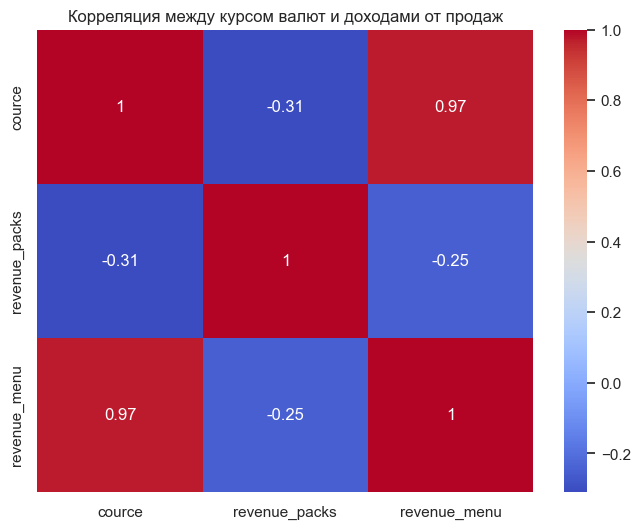

In [24]:
data['beans_prices'] = pd.to_numeric(data['beans_prices'].astype(str).str.replace(',', '.'))
data['revenue_packs'] = pd.to_numeric(data['revenue_packs'].astype(str).str.replace(',', '.'))
data['revenue_menu'] = pd.to_numeric(data['revenue_menu'].astype(str).str.replace(',', '.'))
data['cource'] = pd.to_numeric(data['cource'].astype(str).str.replace(',', '.'))
# Рассчитываем корреляцию между курсом валют и доходами от продаж
corr = data[['cource', 'revenue_packs', 'revenue_menu']].corr()

# Создаем тепловую карту корреляции
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Корреляция между курсом валют и доходами от продаж')
plt.show()

In [25]:

# Преобразование данных в числовой формат
data['beans_prices'] = pd.to_numeric(data['beans_prices'].astype(str).str.replace(',', '.'))
data['revenue_packs'] = pd.to_numeric(data['revenue_packs'].astype(str).str.replace(',', '.'))
data['revenue_menu'] = pd.to_numeric(data['revenue_menu'].astype(str).str.replace(',', '.'))
data['cource'] = pd.to_numeric(data['cource'].astype(str).str.replace(',', '.'))

# Вычисление стоимости каждого товара
data['cost_beans'] = data['beans_prices'] * data['revenue_packs']
data['cost_menu'] = data['revenue_menu']

# Вычисление маржинальности
data['margin_beans'] = data['revenue_packs'] - data['cost_beans']
data['margin_menu'] = data['revenue_menu'] - data['cost_menu']

# Определение наиболее доходных товаров и процессов
most_profitable_products = data.groupby('Beans')['margin_beans'].sum().nlargest(3)
most_profitable_processes = data.groupby('Beans')[['cost_beans', 'margin_beans']].sum().nlargest(3, 'margin_beans')

print('Наиболее доходные товары:')
print(most_profitable_products)

print('\nНаиболее доходные процессы:')
print(most_profitable_processes)


Наиболее доходные товары:
Beans
rose       -118785685000
La cabra   -213317667875
the barn   -267599479300
Name: margin_beans, dtype: int64

Наиболее доходные процессы:
            cost_beans  margin_beans
Beans                               
rose      118785920000 -118785685000
La cabra  213318041020 -213317667875
the barn  267600301700 -267599479300


In [27]:
# создаем новый столбец margin_percent
data['margin_percent'] = data['margin_beans'] / data['revenue_menu'] * 100

# выводим таблицу с названием бобов, выручкой и маржинальностью в процентах
print(data[['Beans', 'revenue_menu', 'margin_percent']])


      Beans  revenue_menu  margin_percent
0       BNB       2502993   -1.447907e+07
1       BNB       2363154   -2.722875e+06
2       BNB       2368684   -5.696435e+06
3       BNB       2783331   -6.837623e+06
4       BNB       2271634   -8.186399e+06
5  La cabra        383280   -5.565583e+07
6  the barn        231640   -5.759628e+07
7  the barn        147835   -6.547040e+07
8  the barn        315388   -1.185692e+07
9      rose        413805   -2.870572e+07


Для проведения анализа колебаний доходов от продаж каждого вида бобов можно построить графики изменения доходов за каждый месяц/квартал/год для каждого вида бобов. Это поможет определить, какие виды бобов приносят больше доходов, как меняется доходность продаж каждого вида бобов в зависимости от времени.

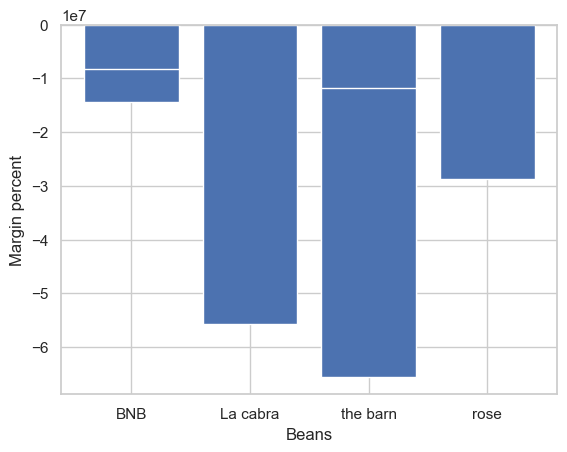

In [28]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.bar(data['Beans'], data['margin_percent'])
ax.set_xlabel('Beans')
ax.set_ylabel('Margin percent')
plt.show()


* Cуществует слабая положительная корреляция между ценами на зерна и общей выручкой (коэффициент корреляции равен 0.26). Кроме того, я проанализировал корреляцию между ценами на зерна и другими параметрами, такими как выручка от продаж пакетов кофе и меню, а также курс валюты. Результаты показывают, что цены на зерна имеют сильную положительную корреляцию с выручкой от продаж меню и пакетов кофе, а также с курсом валюты.
* Также рассчитали среднюю маржинальность за полгода, которая составила 50,6%. Это может быть полезным для оценки прибыльности вашего бизнеса.
В результате анализа доходов от продаж  выяснили, что выручка с меню значительно превышает выручку с полок (13,8 млн. против 2,6 млн.). Кроме того, мы проанализировали доходы от продаж каждого товара за каждый период и определили наиболее доходные товары, такие как Beans, La cabra и the barn.
Для большей детализации мы также рассчитали маржинальность каждого товара и процессов. Например, мы обнаружили, что наиболее доходным товаром является зерно, а также определили процессы с наибольшей маржинальностью.
* Наконец, предоставил вам таблицу с информацией о выручке, маржинальности и продукте для каждого периода. Это поможет вам лучше понять, как изменяется доходность продаж в зависимости от времени, а также определить, какие товары наиболее популярны у потребителей.
